## Preliminary Results: Individual Political Donations

The goal of this notebook is to evaluate the performance of customer lifetime value models (a combination of BB/NBD and Gamma/Gamma) on Political Donations. This will provide preliminary results for the question of **how can we effectively and efficiently measure Donor Lifetime Value.** While political donations were not initially within the scope of this study, prior literature suggests that political donation behaviours may be a proxy for charitable donations. Hence, while preparing to analyze empirical charitable donation datasets from partners such as GivingTuesday, we will access publicly available individual donor data and evaluate the effectiveness of BTYD donor lifetime value (DLV) prediction. The structure of [this notebook](https://www.kaggle.com/code/mursideyarkin/buy-till-you-die-models-customer-lifetime-value/notebook) was used as inspiration to help me approach the BTYD/ Gamma Gamma DLV prediction.

#### Read In Data

This data is access throughed the [Federal Election Commission](https://www.fec.gov/data/browse-data/?tab=bulk-data) and is in the form of txt files. For now, we focus on the 2023-2024 dataset.

In [ ]:
import pandas as pd

In [ ]:
header = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2024/indiv_header_file.csv', header = None)

In [ ]:
first_doc = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2024/itcont_2024_20030211_20230330.txt', sep = "|", header = None)

<ipython-input-3-5afd030c90b8>:1: DtypeWarning: Columns (10,18) have mixed types. Specify dtype option on import or set low_memory=False.
  first_doc = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2024/itcont_2024_20030211_20230330.txt', sep = "|", header = None)


In [ ]:
# Check that the number of columns in the header and data match
if len(header.columns) == len(first_doc.columns):
    # Create a DataFrame using the extracted column names and the data
    first_df = pd.DataFrame(first_doc.values, columns=header.iloc[0])
else:
    print("Number of columns in header and data do not match.")

In [ ]:
first_df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00817940,T,TER,P,202301239574900260,22Y,IND,"DUFF, JAMES",LOS ANGELES,CA,...,NaN,NaN,1192023,800,NaN,500241283,1678288,NaN,NaN,4012320231720334166
1,C00817940,T,TER,P,202301239574900260,22Y,IND,"ROTHMAN, ANDREW",CULVER CITY,CA,...,NaN,NaN,1192023,250,NaN,500241284,1678288,NaN,NaN,4012320231720334167
2,C00817940,T,TER,P,202301239574900260,22Y,IND,"PELLETT, CLARK",CHICAGO,IL,...,NaN,NaN,1202023,345,NaN,500241285,1678288,NaN,NaN,4012320231720334168
3,C00817940,T,TER,P,202301239574900261,22Y,IND,"DISNEY, TIMOTHY",ENCINO,CA,...,NaN,NaN,1192023,615,NaN,500241286,1678288,NaN,NaN,4012320231720334169
4,C00817940,T,TER,P,202301239574900261,22Y,IND,"TRONE, DAVID",POTOMAC,MD,...,NaN,NaN,1192023,5000,NaN,500241287,1678288,NaN,NaN,4012320231720334170


In [ ]:
second_doc = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2024/itcont_2024_20230331_20230527.txt', sep = "|", header = None)

<ipython-input-6-1ba004905665>:1: DtypeWarning: Columns (10,18) have mixed types. Specify dtype option on import or set low_memory=False.
  second_doc = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2024/itcont_2024_20230331_20230527.txt', sep = "|", header = None)


In [ ]:
# Check that the number of columns in the header and data match
if len(header.columns) == len(second_doc.columns):
    # Create a DataFrame using the extracted column names and the data
    second_df = pd.DataFrame(second_doc.values, columns=header.iloc[0])
else:
    print("Number of columns in header and data do not match.")

In [ ]:
second_df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00497545,N,M4,P,202303309579692161,15,IND,"HITCHCOCK, TODD",PHOENIX,AZ,...,UTI,SVP STRATEGY,3312023,150,NaN,SA11AI.6895,1695368,NaN,NaN,4033120231738355165
1,C00497545,N,M4,P,202303309579692160,15,IND,"ANDERSON, TROY",SCOTTSDALE,AZ,...,UNIVERSAL TECHNICAL INSTITUTE,CFO,3312023,150,NaN,SA11AI.6894,1695368,NaN,NaN,4033120231738355160
2,C00497545,N,M4,P,202303309579692160,15,IND,"BRENNER, MARK",PHOENIX,AZ,...,UNIVERSAL TECHNICAL INSTITUTE,VP CORPORATE AFFAIRS,3312023,150,NaN,SA11AI.6897,1695368,NaN,NaN,4033120231738355161
3,C00497545,N,M4,P,202303309579692160,15,IND,"CUMMINGS, DAVID",SCOTTSDALE,AZ,...,UTI,VP TECHNOLOGY SOLUTIONS,3312023,115,NaN,SA11AI.6890,1695368,NaN,NaN,4033120231738355162
4,C00497545,N,M4,P,202303309579692161,15,IND,"FESPERMAN, BARTLEY",PHOENIX,AZ,...,UNIVERSAL TECHNICAL INSTITUTE,CHIEF COMMERCIAL OFFICER,3312023,300,NaN,SA11AI.6896,1695368,NaN,NaN,4033120231738355163


In [ ]:
third_doc = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2024/itcont_2024_20230528_20230723.txt', sep = "|", header = None)

<ipython-input-9-36d499ccdba4>:1: DtypeWarning: Columns (10,18) have mixed types. Specify dtype option on import or set low_memory=False.
  third_doc = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2024/itcont_2024_20230528_20230723.txt', sep = "|", header = None)


In [ ]:
# Check that the number of columns in the header and data match
if len(header.columns) == len(third_doc.columns):
    # Create a DataFrame using the extracted column names and the data
    third_df = pd.DataFrame(third_doc.values, columns=header.iloc[0])
else:
    print("Number of columns in header and data do not match.")

In [ ]:
fourth_doc = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2024/itcont_2024_20230724_20260622.txt', sep = "|", header = None)
if len(header.columns) == len(fourth_doc.columns):
    # Create a DataFrame using the extracted column names and the data
    fourth_df = pd.DataFrame(fourth_doc.values, columns=header.iloc[0])
else:
    print("Number of columns in header and data do not match.")

<ipython-input-11-be0d3a5aa90f>:1: DtypeWarning: Columns (10,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  fourth_doc = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2024/itcont_2024_20230724_20260622.txt', sep = "|", header = None)


In [ ]:
dataframes = [first_df, second_df, third_df, fourth_df]
individual_donor_df = pd.concat(dataframes, ignore_index= True)

In [ ]:
individual_donor_df.shape

(7704755, 21)

#### Cleaning and EDA

The goal is to extract the variables we need for our DLV analysis. These include:


*   **Recency**: Age of the customer at the time of their last purchase, i.e. the difference between their earliest and latest transaction.
*   **Monetary Value**: The average total sales of the customer
*   **Frequency**: Number of purchases/transactions in the period
*   **Age (T)**: The time between the first customer purchase and now.



To get these variables, we first need to organize our data. In particular, let's clean the date column.

In [ ]:
# first, let's see what columns we have
individual_donor_df.columns

Index(['CMTE_ID', 'AMNDT_IND', 'RPT_TP', 'TRANSACTION_PGI', 'IMAGE_NUM',
       'TRANSACTION_TP', 'ENTITY_TP', 'NAME', 'CITY', 'STATE', 'ZIP_CODE',
       'EMPLOYER', 'OCCUPATION', 'TRANSACTION_DT', 'TRANSACTION_AMT',
       'OTHER_ID', 'TRAN_ID', 'FILE_NUM', 'MEMO_CD', 'MEMO_TEXT', 'SUB_ID'],
      dtype='object', name=0)

##### Transaction Date

We have 21 columns. Let's look specifically at transaction_dt.

In [ ]:
individual_donor_df['TRANSACTION_DT']

0          1192023
1          1192023
2          1202023
3          1192023
4          1192023
            ...   
7704750    9202023
7704751    7262023
7704752    9082023
7704753    7262023
7704754    9082023
Name: TRANSACTION_DT, Length: 7704755, dtype: object

In [ ]:
# Convert the TRANSACTION_DT column to a string
individual_donor_df['TRANSACTION_DT'] = individual_donor_df['TRANSACTION_DT'].astype(str)

In [ ]:
individual_donor_df['TRANSACTION_DT'] = pd.to_datetime(individual_donor_df['TRANSACTION_DT'], format='%m%d%Y', errors='coerce')

In [ ]:
individual_donor_df['TRANSACTION_DT'].dtype

dtype('<M8[ns]')

In [ ]:
individual_donor_df['TRANSACTION_DT']

0         2023-11-09
1         2023-11-09
2         2023-01-20
3         2023-11-09
4         2023-11-09
             ...    
7704750   2023-09-20
7704751   2023-07-26
7704752   2023-09-08
7704753   2023-07-26
7704754   2023-09-08
Name: TRANSACTION_DT, Length: 7704755, dtype: datetime64[ns]

Information to know about the dates column:


*   Earliest transaction date? **2003-02-11**
*   Date with highest transaction volume? **30-06-2023**
*   Month with highest transaction volume? **June 2023**
*   Latest transaction date? **2026-06-22**



In [ ]:
min_date = individual_donor_df['TRANSACTION_DT'].min()
print(min_date)

2003-02-11 00:00:00


In [ ]:
max_date = individual_donor_df['TRANSACTION_DT'].max()
print(max_date)

2026-06-22 00:00:00


In [ ]:
# Ensure that the 'TRANSACTION_DT' column is of datetime data type
individual_donor_df['TRANSACTION_DT'] = pd.to_datetime(individual_donor_df['TRANSACTION_DT'])

# Group the data by both month and year and count the number of transactions in each combination
monthly_yearly_counts = individual_donor_df.groupby([individual_donor_df['TRANSACTION_DT'].dt.year, individual_donor_df['TRANSACTION_DT'].dt.month]).size()

# Find the combination of month and year with the highest number of transactions
max_month_year = monthly_yearly_counts.idxmax()

# Unpack the result to get the month and year
max_month, max_year = max_month_year

print(f"Month and Year with the highest number of transactions: {max_month:02d}-{max_year}")

Month and Year with the highest number of transactions: 2023-6


In [ ]:
# Use value_counts to count the number of transactions for each date
date_counts = individual_donor_df['TRANSACTION_DT'].value_counts()

# Find the date with the highest transaction volume
max_date = date_counts.idxmax()

# Extract the day, month, and year from the max_date
max_day = max_date.day
max_month = max_date.month
max_year = max_date.year

print(f"Date with the highest transaction volume: {max_day:02d}-{max_month:02d}-{max_year}")


Date with the highest transaction volume: 30-06-2023


What doesn't make sense is the 2003 and 2026 dates. Why is there such a wide range in a dataset meant to capture only 2023-2024 data? What does it even mean for a transaction to be in 2026? Is this a scheduled transaction? Let's take a look at those later dates.

In [ ]:
# Filter rows where 'TRANSACTION_DT' is later than 2023
post_2023_df = individual_donor_df[individual_donor_df['TRANSACTION_DT'].dt.year > 2023]

# Print the filtered DataFrame
post_2023_df

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
5944061,C00575126,A,Q2,P2024,202307159583543234,15E,IND,"KARAS, BARRY",WASHINGTON,DC,...,RETIRED,RETIRED,2026-06-22,50,C00441949,15907197,1714442,NaN,* EARMARKED CONTRIBUTION THROUGH JSTREETPAC ON...,4080220231759276085


In [ ]:
individual_donor_df =  individual_donor_df[individual_donor_df['TRANSACTION_DT'].dt.year <= 2023]

There is only one transaction in 2026. Let's drop this column, because it's difficult to know it's relevance to our data.

In [ ]:
# Filter rows where 'TRANSACTION_DT' is earlier than 2023
pre_2023_df = individual_donor_df[individual_donor_df['TRANSACTION_DT'].dt.year < 2022]

# Print the filtered DataFrame
pre_2023_df

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
655733,C00652727,A,Q1,G2024,202305309581690999,15,IND,"HEARST, SUSAN",MILLSAP,TX,...,NONE,RETIRED,2021-02-26,1000,NaN,SA11A.127508,1706134,X,REFUNDED $800.00 ON 02/09/2023,4060120231748622152
727814,C00371302,A,Q1,G2024,202306169582166102,15E,IND,"GAFFNEY, CHRIS",BOSTON,MA,...,"GREAT HILL PARTNERS, LLC",PRIVATE EQUITY,2003-02-12,3300,C00468314,7580412,1707650,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4061720231750585113
727815,C00371302,A,Q1,P2024,202306169582166130,15E,IND,"MAYER, TONY",DENVER,CO,...,RETIRED,RETIRED,2003-02-11,3300,C00468314,7580315,1707650,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4061720231750585197
727816,C00371302,A,Q1,P2024,202306169582166138,15E,IND,"MERINOFF, CHARLES",NEW YORK,NY,...,BREAKTHRU BEVERAGE,EXECUTIVE,2003-02-11,3300,C00468314,7580316,1707650,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4061720231750585221
727817,C00371302,A,Q1,P2024,202306169582166148,15E,IND,"BEALL, DONALD R.",CORONA DEL MAR,CA,...,RETIRED,RETIRED,2003-02-11,1000,C00468314,7580317,1707650,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4061720231750585253
727818,C00371302,A,Q1,P2024,202306169582166156,15E,IND,"MCCLAIN, MARK",AUSTIN,TX,...,SAILPOINT,CEO,2003-02-11,3300,C00468314,7580318,1707650,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4061720231750585277
727819,C00371302,A,Q1,P2024,202306169582166167,15E,IND,"GAFFNEY, CHRIS",BOSTON,MA,...,"GREAT HILL PARTNERS, LLC",PRIVATE EQUITY,2003-02-12,3300,C00468314,7580319,1707650,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4061720231750585310
762335,C00575126,A,Q2,P2024,202307159583543233,15E,IND,"KARAS, BARRY",WASHINGTON,DC,...,RETIRED,RETIRED,2019-05-22,50,C00441949,15602421,1714442,NaN,* EARMARKED CONTRIBUTION THROUGH JSTREETPAC ON...,4080220231759276082
762336,C00575126,A,Q2,P2024,202307159583543234,15E,IND,"KARAS, BARRY",WASHINGTON,DC,...,RETIRED,RETIRED,2019-05-19,50,C00441949,15602422,1714442,NaN,* EARMARKED CONTRIBUTION THROUGH JSTREETPAC ON...,4080220231759276083
772636,C00508804,N,Q2,P2024,202307159583560501,15,IND,"INGRAM, PETER",HONOLULU,HI,...,HAWAIIAN AIRLINES INC.,MANAGEMENT,2021-06-13,1500,NaN,A-467603O,1714512,X,ORIGINAL CONTRIBUTION AS PREVIOUSLY REPORTED,4072420231756830184


Interesting. So there are > 6000 transactions made prior to the year 2023. There are 12 transactions made prior to the year 2022. However, we can see from the TRANSACTION_PGI column, that these transactions are contributions made for the 2024 election cycle. So, the logical explanation is that individuals in 2003 were making contributions for future election cycles (well in advance!) Still, let's limit the transaction earliness to 2021 to ensure that the there aren't other variables affecting our model that could be related to such a large gap in time.

In [ ]:
individual_donor_df =  individual_donor_df[individual_donor_df['TRANSACTION_DT'].dt.year >- 2021]

##### Individual ID

Now, let's look for a column that can help us identify individual donors so we can group by them for our RFM variables. Referring to [this site](https://www.fec.gov/campaign-finance-data/contributions-individuals-file-description/), it appears that there are no unique identifiers for individuals that are not political contributors. We can however, use the other individually identifying columns include Individual Name, Zipcode, State, and City to match users. After we've matched users, let's manually create a unique ID (starting from 1) that numbers users we believe to be the same user based on these matching variables.

Note that the key assumption we're making here is that in this timeline, people don't change name, zipcode, state or city.

In [ ]:
# first, just out of curiosity, let's see how many unique names we have
individual_donor_df['NAME'].nunique()

893009

In [ ]:
individual_donor_df.shape

(7704754, 21)

In [ ]:
print("suggested average transactions per unique name:", 7704754 / 893009)

suggested average transactions per unique name: 8.627857054072244


This seems realistic. Let's go on and see how this changes if we match on the values above.

In [ ]:
#individual_donor_df['DONOR_ID_attempt'] = individual_donor_df.groupby(['NAME', 'CITY', 'STATE', 'ZIP_CODE']).ngroup()

In [ ]:
# sense-check, this value should be more than 893009
#individual_donor_df['DONOR_ID_attempt'].nunique()

In [ ]:
print("suggested average transactions per unique DONOR_ID:", 7704754 / 1589695)

suggested average transactions per unique DONOR_ID: 4.846686943092857


This still makes sense. Now, let's do a spot-check to make sure we have this right. Let's look at some people who had the same name, and who do not have the same user ID.

In [ ]:
# # Find duplicate names and their corresponding 'DONOR_ID' values
# duplicate_names = individual_donor_df[individual_donor_df.duplicated(subset='NAME', keep=False)]

# # Group by 'NAME' and filter for those with more than one unique 'DONOR_ID'
# duplicates = duplicate_names[duplicate_names.duplicated(subset=['NAME', 'DONOR_ID_attempt'], keep=False)]

In [ ]:
# duplicates.head()

In [ ]:
individual_donor_df[individual_donor_df['NAME'] == 'PELLETT, CLARK'][['CITY', 'STATE', 'NAME', 'ZIP_CODE', 'OCCUPATION']]

,CITY,STATE,NAME,ZIP_CODE,OCCUPATION
2,CHICAGO,IL,"PELLETT, CLARK",606114546,NaN
304951,CHICAGO,IL,"PELLETT, CLARK",606114482,ATTORNEY
597125,CHICAGO,IL,"PELLETT, CLARK",606114482.0,ATTORNEY
1530034,CHICAGO,IL,"PELLETT, CLARK",606114482.0,ATTORNEY
1544180,CHICAGO,IL,"PELLETT, CLARK",606114546,ATTORNEY
1648346,CHICAGO,IL,"PELLETT, CLARK",606114546,ATTORNEY
1648410,CHICAGO,IL,"PELLETT, CLARK",606114546,ATTORNEY
1648483,CHICAGO,IL,"PELLETT, CLARK",606114546,ATTORNEY
1720456,CHICAGO,IL,"PELLETT, CLARK",606114482,ATTORNEY
1720457,CHICAGO,IL,"PELLETT, CLARK",606114482,ATTORNEY


In [ ]:
individual_donor_df[individual_donor_df['NAME'] == 'DUFF, JAMES'][['CITY', 'STATE', 'NAME', 'ZIP_CODE']]

,CITY,STATE,NAME,ZIP_CODE
0,LOS ANGELES,CA,"DUFF, JAMES",900271058
304943,LOS ANGELES,CA,"DUFF, JAMES",90027
800606,LOS ANGELES,CA,"DUFF, JAMES",900271058
802563,LOS ANGELES,CA,"DUFF, JAMES",900271058
1324436,LOS ANGELES,CA,"DUFF, JAMES",90027.0
1324467,LOS ANGELES,CA,"DUFF, JAMES",90027.0
2589445,LOS ANGELES,CA,"DUFF, JAMES",900271058.0
2953639,LOS ANGELES,CA,"DUFF, JAMES",90027.0
3321855,LOS ANGELES,CA,"DUFF, JAMES",90027
3321856,LOS ANGELES,CA,"DUFF, JAMES",90027


Aha! So we have found that there is an issue: the zip code values are sometimes in 5 digits, sometimes in larger digits. Furthermore, zipcodes are not only formatted differently but may be off by a small amount (for example,  606114482 vs 606114546). We still can assume PELLET, CLARK is one person. So let's instead change the above definition of DONOR ID so that it includes CITY, STATE, NAME only. Note also that we can see in Clark's example that Employment may not be a good choice here, since he was sometimes employed, sometimes not, but is clearly by training an attorney!

In [ ]:
individual_donor_df['DONOR_ID'] = individual_donor_df.groupby(['NAME', 'CITY', 'STATE']).ngroup()

In [ ]:
individual_donor_df['DONOR_ID'].nunique()

1022008

In [ ]:
#individual_donor_df.drop(columns=['DONOR_ID_attempt'], inplace=True)

In [ ]:
individual_donor_df.shape

(7704754, 22)

In [ ]:
print("suggested number of transactions per unique id: ", 7704754 / 1022008)

suggested number of transactions per unique id:  7.538839226307426


Now, let's learn a little more about these donors.


*   What are the distributions of the states? Where do our users come from?
*   What user has the most transactions?
*   What user has donated most recently?
*   What are the distributions of the users' occupations?



In [ ]:
# Calculate the count of unique donors in each state
state_counts = individual_donor_df.groupby('STATE')['DONOR_ID'].nunique()

# Calculate the total number of unique donors
total_donors = state_counts.sum()

# Calculate the distribution in percentages
state_distribution = (state_counts / total_donors) * 100

In [ ]:
state_distribution = state_distribution.sort_values(ascending = False)

In [ ]:
state_distribution

STATE
CA    13.454787
TX     7.884087
FL     6.362475
NY     6.055726
PA     4.046935
        ...    
AP     0.004599
AS     0.001174
MP     0.000587
FM     0.000196
PW     0.000098
Name: DONOR_ID, Length: 62, dtype: float64

In [ ]:
# Calculate the count of unique donors for each occupation
occupation_counts = individual_donor_df.groupby('OCCUPATION')['DONOR_ID'].nunique()

# Calculate the total number of unique donors
total_donors = occupation_counts.sum()

# Calculate the distribution in percentages
occupation_distribution = (occupation_counts / total_donors) * 100

occupation_distribution = occupation_distribution.sort_values(ascending = False)

In [ ]:
occupation_distribution

OCCUPATION
RETIRED                      23.969717
NOT EMPLOYED                 13.599939
ATTORNEY                      3.085472
PHYSICIAN                     1.496698
PRESIDENT                     1.164474
                               ...    
AVP FLEET MANAGEMENT          0.000000
VP, HR - TALENT MANAGEMEN     0.000000
VICE PRESIDENT EQUIPMENT      0.000000
VICE PRESIDENT/CRANE WORK     0.000000
LANGUAGE EDITOR               0.000000
Name: DONOR_ID, Length: 119564, dtype: float64

In [ ]:
# Group the data by 'DONOR_ID' and count the number of transactions (rows) for each user
user_transaction_counts = individual_donor_df.groupby('DONOR_ID').size()

# Sort the results in descending order to find the top 10 users
top_10_users = user_transaction_counts.sort_values(ascending=False).head(10)

# Print the 10 users with the most transactions
print("Top 10 Users with the Most Transactions:")
print(top_10_users)

Top 10 Users with the Most Transactions:
DONOR_ID
442011.0     12383
481282.0      9819
566911.0      8062
1003501.0     6865
583620.0      6414
486208.0      5932
120489.0      5603
512235.0      5590
936795.0      5300
292156.0      5186
dtype: int64


In [ ]:
# Group the data by 'DONOR_ID' and sum the 'TRANSACTION_AMT' for each user
user_total_donations = individual_donor_df.groupby('DONOR_ID')['TRANSACTION_AMT'].sum()

# Sort the results in descending order to find the top 10 users with the largest total amount donated
top_10_donors = user_total_donations.sort_values(ascending=False).head(10)

# Print the top 10 users with the largest total amount donated
print("Top 10 Users with the Largest Total Amount Donated:")
print(top_10_donors)

Top 10 Users with the Largest Total Amount Donated:
DONOR_ID
260979.0     82500000
495662.0     25250000
873861.0     25000000
74320.0      20000500
1010214.0    15900000
806003.0     12250000
612299.0     11009500
685581.0     10800000
685582.0     10000000
566649.0      8750000
Name: TRANSACTION_AMT, dtype: object


##### Monetary Value

Finally, let's look at and understand the amount column. Let's uncover:


*   Maximum Transaction Amount
*   Minimum Transaction Amount
*   Average Transaction Amount



In order to make sure we're doing the right calculations for monetary value, let's verify that each row is a unique transaction.

In [ ]:
individual_donor_df.shape

(7704754, 22)

In [ ]:
individual_donor_df['FILE_NUM'].nunique()

15542

In [ ]:
individual_donor_df['TRAN_ID'].nunique()

7442151

In [ ]:
7704754 - 7442151

262603

These values make sense. The FEC site notes that File Number is focused on overall filings, which could be very low. Tran_ID is lower that but in the same order of magnitude as the number of rows because it actually only contains *online transactions*. Hence, we move on with the assumption that each row is a transaction.

In [ ]:
maximum_transaction_amt = individual_donor_df['TRANSACTION_AMT'].max()
print(maximum_transaction_amt)

82500000


In [ ]:
minimum_transaction_amt = individual_donor_df['TRANSACTION_AMT'].min()
print(minimum_transaction_amt)

-250000


Interesting... why are there negatives? Let's explore and clean.

In [ ]:
individual_donor_df['MEMO_TEXT'] = individual_donor_df['MEMO_TEXT'].astype(str)

In [ ]:
individual_donor_df['MEMO_TEXT'].head()

0    nan
1    nan
2    nan
3    nan
4    nan
Name: MEMO_TEXT, dtype: object

In [ ]:
individual_donor_df[(individual_donor_df['TRANSACTION_AMT'] < 0) & (individual_donor_df['MEMO_TEXT'] != 'nan')]

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,DONOR_ID
1661,C00283135,N,M2,P,202302109578207786,22Y,IND,"NELSON, MARY JAYNE",LINCOLN,NE,...,NaN,2023-01-10,-1200,NaN,17125365,1688389,NaN,VOID - MARY JAYNE NELSON,4021020231725302446,661655.0
13233,C00000935,N,M2,P,202302179578668063,15,IND,"LABOE, NORMAN",SAN FRANCISCO,CA,...,NOT EMPLOYED,2023-12-05,-300,NaN,40024194,1689785,NaN,*2022 OVER LIMIT CONTRIBUTION TRANSFERRED TO H...,4022220231732569783,510497.0
13275,C00000935,N,M2,P,202302179578667935,15E,IND,"HOVI, MARIE",BERWYN,IL,...,INTERNET MARKETING MANAGER,2023-10-02,-312,C00401224,39944557,1689785,NaN,NSF - EARMARKED THROUGH ACTBLUE,4022220231732569399,421585.0
13292,C00000935,N,M2,P,202302179578667709,15E,IND,"DEERSON, ARNOLD",SANTA BARBARA,CA,...,NOT EMPLOYED,2023-10-08,-500,C00401224,39971998,1689785,NaN,NSF - EARMARKED THROUGH ACTBLUE,4022220231732568721,215972.0
13523,C00000935,N,M2,P,202302179578668185,15E,IND,"MOSCHNER, HERMA",CLEARWATER,FL,...,NOT EMPLOYED,2023-12-06,-625,C00401224,40032957,1689785,NaN,NSF - EARMARKED THROUGH ACTBLUE,4022220231732570148,644213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704598,C00376939,N,Q3,P2024,202310159598026419,15,IND,"JAHNS, RICHARD",EULESS,TX,...,RETIRED,2023-08-01,-10,NaN,SA11A.621121,1731230,NaN,CHARGED BACK,4101720231805273200,442011.0
7704603,C00376939,N,Q3,P2024,202310159598026467,15,IND,"SCHWARZMAN, STEPHEN A. MR.",NEW YORK,NY,...,CHAIRMAN & CEO,2023-08-08,-3300,NaN,SA11A.630348,1731230,X,REDESIGNATION TO GENERAL,4101720231805273343,819906.0
7704621,C00376939,N,Q3,P2024,202310159598026376,15E,IND,"DRESNER, LINDA",BIRMINGHAM,MI,...,RETAIL MERCHANT,2023-09-14,-2970,C00797670,SA11A.671220,1731230,X,REDESIGNATION TO GENERAL,4101720231805273071,240565.0
7704626,C00376939,N,Q3,P2024,202310159598026378,15E,IND,"LEVY, EDWARD",BIRMINGHAM,MI,...,CHAIRMAN,2023-09-14,-3014,C00797670,SA11A.671218,1731230,X,REDESIGNATION TO GENERAL,4101720231805273076,535882.0


It looks like these negative donations are actually as a result of chargebacks, over limit donations, and redesignation from an accounting perspective. This is judging from the limited information we have from the MEMO_TEXT column. Based on this, we can formulate an assumption that these negative transactions are refunds or something like that and not needed in our particular analysis. For now, let's keep all transactions that are positive.



In [ ]:
individual_donor_df = individual_donor_df[individual_donor_df['TRANSACTION_AMT'] > 0]

In [ ]:
minimum_transaction_amt = individual_donor_df['TRANSACTION_AMT'].min()
print(minimum_transaction_amt)

1


In [ ]:
mean_transaction_amt = individual_donor_df['TRANSACTION_AMT'].mean()
print(mean_transaction_amt)

282.932770575293


##### Download the cleaned data

In [ ]:
# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Thesis WH399/2024/individual_donor_cleaned.csv'

# Save the rfm DataFrame as a CSV file
individual_donor_df.to_csv(file_path, index=False)

# Confirm that the file has been saved
print(f'donor df data saved as {file_path}')

donor df data saved as /content/drive/MyDrive/Thesis WH399/2024/individual_donor_cleaned.csv


#### Create the RFM dataset

Now, we have all the pieces ready to build the dataset we will use for our BTYD x Gamma Gamma model for DLV prediction. Let's create a dataset with donor_id, next to Recency, Frequency, Monetary, Age, as defined in the earlier section of this notebook.

In [ ]:
individual_donor_df.columns

Index(['CMTE_ID', 'AMNDT_IND', 'RPT_TP', 'TRANSACTION_PGI', 'IMAGE_NUM',
       'TRANSACTION_TP', 'ENTITY_TP', 'NAME', 'CITY', 'STATE', 'ZIP_CODE',
       'EMPLOYER', 'OCCUPATION', 'TRANSACTION_DT', 'TRANSACTION_AMT',
       'OTHER_ID', 'TRAN_ID', 'FILE_NUM', 'MEMO_CD', 'MEMO_TEXT', 'SUB_ID',
       'DONOR_ID'],
      dtype='object', name=0)

In [ ]:
individual_donor_df.shape

(7415265, 22)

In [ ]:
from datetime import date

In [ ]:
last_day_of_2023 = date(2023, 12, 31)

In [ ]:
individual_donor_df['DONATION_ID'] = range(1, len(individual_donor_df) + 1)

In [ ]:
individual_donor_df.columns

Index(['CMTE_ID', 'AMNDT_IND', 'RPT_TP', 'TRANSACTION_PGI', 'IMAGE_NUM',
       'TRANSACTION_TP', 'ENTITY_TP', 'NAME', 'CITY', 'STATE', 'ZIP_CODE',
       'EMPLOYER', 'OCCUPATION', 'TRANSACTION_DT', 'TRANSACTION_AMT',
       'OTHER_ID', 'TRAN_ID', 'FILE_NUM', 'MEMO_CD', 'MEMO_TEXT', 'SUB_ID',
       'DONOR_ID', 'DONATION_ID'],
      dtype='object', name=0)

In [ ]:
individual_donor_df['TRANSACTION_DT'].dtype

dtype('<M8[ns]')

In [ ]:
# Convert last_day_of_2023 to a Pandas Timestamp
last_day_of_2023 = pd.Timestamp(last_day_of_2023)

# Create a function to calculate Recency
def calculate_recency(date_group):
    return (date_group.max() - date_group.min()).days

# Define aggregation functions for each column
agg_functions = {
    'DONATION_ID': 'count',  # Frequency
    'TRANSACTION_AMT': 'mean',  # Monetary Value
    'TRANSACTION_DT': [lambda date: calculate_recency(date), lambda date: (last_day_of_2023 - date.min()).days],  # Recency and Age
}

# Group by 'DONOR_ID' and apply the aggregation functions
rfm = individual_donor_df.groupby('DONOR_ID').agg(agg_functions)

# Rename columns for clarity
rfm.columns = ['Frequency', 'Monetary Value', 'Recency', 'Age']

# Print the resulting RFM DataFrame
print(rfm)


           Frequency  Monetary Value  Recency  Age
DONOR_ID                                          
0.0               11       72.000000      142  333
1.0                1      500.000000        0  286
2.0                8       34.000000      100  291
3.0                7       33.000000       86  277
4.0               11       80.272727      142  333
...              ...             ...      ...  ...
1022003.0          5       15.000000       60  153
1022004.0          1      500.000000        0  252
1022005.0         15       96.000000      196  324
1022006.0          3       34.000000       64  199
1022007.0          1      225.000000        0  159

[1005531 rows x 4 columns]


In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Thesis WH399/rfm.csv'

# Save the rfm DataFrame as a CSV file
rfm.to_csv(file_path, index=False)

# Confirm that the file has been saved
print(f'RFM data saved as {file_path}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
RFM data saved as /content/drive/MyDrive/Thesis WH399/rfm.csv


### Creation of Train and Test Data

##### Read in data for 2022

This is a much larger dataset. We ensure that we don't lose our data in between classes by saving intermediate datasets to the drive. Here are the steps:



1.   Read in 34 datasets including the list of invalid rows
2.   Create a concantenated dataset including no invalid rows and relavant columns for RFM calculation
3.   Match the donor ideas in the concantenated 2022 dataset with the individual_donor_df in 2023 so that they are consistent
4.   Create an rfm df that includes all of 2022 - 2023 data
5.   Create a sample of 10000 donors from this grouped RFM data
6.   Split these 10000 donors into train (12 months) and holdout (12 months)



In [ ]:
import pandas as pd

In [ ]:
dfjustpeople = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/dfjustpeople1234567and8.csv')

In [ ]:
dfjustpeople['DONOR_ID'] = dfjustpeople.groupby(['NAME', 'STATE', 'CITY']).ngroup() + 1

In [ ]:
# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Thesis WH399/2022/df_withpplonly_withdonorid.csv'

# Save the rfm DataFrame as a CSV file
dfjustpeople.to_csv(file_path, index=False)

# Confirm that the file has been saved
print(f'df_withpplonly_withdonorid data saved as {file_path}')

df_withpplonly_withdonorid data saved as /content/drive/MyDrive/Thesis WH399/2022/df_withpplonly_withdonorid.csv


In [ ]:
dfjustpeople = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/df_withpplonly_withdonorid.csv')

In [ ]:
# before we get the sample, we need to remove the invalid rows
# they gave us a separate txt file with invalid rows
# let's read this file in and remove all names contained within the invalid rows
header = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2024/indiv_header_file.csv', header = None)

In [ ]:
invalid_df = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/itcont_2022_invalid_dates.txt', sep = "|", header = None)

In [ ]:
# Check that the number of columns in the header and data match
if len(header.columns) == len(invalid_df.columns):
    # Create a DataFrame using the extracted column names and the data
    invalid_df = pd.DataFrame(invalid_df.values, columns=header.iloc[0])
else:
    print("Number of columns in header and data do not match.")

In [ ]:
# how many invalid dates are there?
print('Number of invalid rows dates: ', len(invalid_df))
# this is not a significant number and should filter out with the date filtration.
# we will move on with sampling for now

Number of invalid rows dates:  8


In [ ]:
# Get a sample of 10,000 'DONOR_ID's
sample_size = 10000
dfjustpeoplesample = dfjustpeople.sample(n=sample_size, random_state=42)

# Get the remaining rows (non-sample)
dfjustpeopleremainingpop = dfjustpeople[~dfjustpeople['DONOR_ID'].isin(dfjustpeoplesample['DONOR_ID'])]

# Now, dfjustpeoplesample contains the sample of 10,000 'DONOR_ID's, and dfjustpeopleremainingpop contains the remaining rows.

In [ ]:
len(dfjustpeopleremainingpop)

62860092

In [ ]:
len(dfjustpeoplesample)

10000

In [ ]:
dfjustpeoplesample.head()

,NAME,STATE,CITY,DONOR_ID
44389664,"ZIOLKOWSKI, TERRY",MD,SHARPSBURG,3805626.0
15259121,"MACGREGOR, JANICE",MD,BALTIMORE,2094841.0
52115563,"HALE JR, RONALD B",TX,ROWLETT,1360468.0
58755406,"STOUT, EVANS",NC,EMERALD ISLE,3307000.0
28695078,"GEHRING, MARGERY",FL,CLERMONT,1192228.0


.... and these are our 10, 000 donors!

In [ ]:
# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Thesis WH399/2022/donor_idsofsample.csv'

# Save the rfm DataFrame as a CSV file
dfjustpeoplesample.to_csv(file_path, index=False)

# Confirm that the file has been saved
print(f'donor_idsofsample data saved as {file_path}')

donor_idsofsample data saved as /content/drive/MyDrive/Thesis WH399/2022/donor_idsofsample.csv


#### Create the Sample Dataset Given the Sample Donor ID's

Remember that to create the rfm df, the variables of interest are:


*   DONOR_ID
*   TRANSACTION_DT
*   TRANSACTION_AMT
*   DONATION_ID

To construct this, let's get a concantenated dataframe containing only those 10,000 donor IDs, across 2021 through 2024 data. Then, let's add a DONATION_ID column and compute rfm as we did on the 2022 data alone. Then, let's get the latest date in the TRANSACTION_DT column for the dataset, and minus 12 months then 24 months to get the holdout and training datasets respectively.


In [ ]:
import pandas as pd

In [ ]:
# og data (2023 - 2024 data)
data_2023_24 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2024/individual_donor_cleaned.csv')

<ipython-input-2-13212a7a9264>:2: DtypeWarning: Columns (10,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2023_24 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2024/individual_donor_cleaned.csv')


In [ ]:
sample_donorids = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/donor_idsofsample.csv')

In [ ]:
data_2023_24 = data_2023_24[['NAME', 'STATE', 'CITY', 'TRANSACTION_DT', 'TRANSACTION_AMT']]

In [ ]:
data_2023_24.head()

,NAME,STATE,CITY,TRANSACTION_DT,TRANSACTION_AMT
0,"DUFF, JAMES",CA,LOS ANGELES,2023-11-09,800
1,"ROTHMAN, ANDREW",CA,CULVER CITY,2023-11-09,250
2,"PELLETT, CLARK",IL,CHICAGO,2023-01-20,345
3,"DISNEY, TIMOTHY",CA,ENCINO,2023-11-09,615
4,"TRONE, DAVID",MD,POTOMAC,2023-11-09,5000


In [ ]:
# Merge dataset_2 with dataset_1 using 'NAME,' 'STATE,' and 'CITY' as the common key
sample_2023_24 = data_2023_24.merge(sample_donorids, on=['NAME', 'STATE', 'CITY'], how='inner')

In [ ]:
# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Thesis WH399/2024/sample_data_for_rfm.csv'

# Save the rfm DataFrame as a CSV file
sample_2023_24.to_csv(file_path, index=False)

# Confirm that the file has been saved
print(f'sample_data_for_rfm data saved as {file_path}')

sample_data_for_rfm data saved as /content/drive/MyDrive/Thesis WH399/2024/sample_data_for_rfm.csv


In [ ]:
data_2022_concat1 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat1.csv')

<ipython-input-9-7f9f7eb8c4c1>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022_concat1 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat1.csv')


In [ ]:
data_2022_concat1 = data_2022_concat1[['NAME', 'STATE', 'CITY', 'TRANSACTION_DT', 'TRANSACTION_AMT']]

In [ ]:
# Merge dataset_2 with dataset_1 using 'NAME,' 'STATE,' and 'CITY' as the common key
sample_2022_concat1 = data_2022_concat1.merge(sample_donorids, on=['NAME', 'STATE', 'CITY'], how='inner')

In [ ]:
# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Thesis WH399/2022/concat1sample_data_for_rfm.csv'

# Save the rfm DataFrame as a CSV file
sample_2022_concat1.to_csv(file_path, index=False)

# Confirm that the file has been saved
print(f'concat1sample_data_for_rfm data saved as {file_path}')

concat1sample_data_for_rfm data saved as /content/drive/MyDrive/Thesis WH399/2022/concat1sample_data_for_rfm.csv


In [ ]:
data_2022_concat2 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat2.csv')

<ipython-input-15-5598afc394f5>:1: DtypeWarning: Columns (3,10,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022_concat2 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat2.csv')


In [ ]:
data_2022_concat2 = data_2022_concat2[['NAME', 'STATE', 'CITY', 'TRANSACTION_DT', 'TRANSACTION_AMT']]

In [ ]:
sample_2022_concat2 = data_2022_concat2.merge(sample_donorids, on=['NAME', 'STATE', 'CITY'], how='inner')

In [ ]:
# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Thesis WH399/2022/concat2sample_data_for_rfm.csv'

# Save the rfm DataFrame as a CSV file
sample_2022_concat2.to_csv(file_path, index=False)

In [ ]:
data_2022_concat3 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat3.csv')
data_2022_concat3 = data_2022_concat3[['NAME', 'STATE', 'CITY', 'TRANSACTION_DT', 'TRANSACTION_AMT']]
sample_2022_concat3 = data_2022_concat3.merge(sample_donorids, on=['NAME', 'STATE', 'CITY'], how='inner')

<ipython-input-21-462e514abea7>:1: DtypeWarning: Columns (10,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022_concat3 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat3.csv')


In [ ]:
# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Thesis WH399/2022/concat3sample_data_for_rfm.csv'

# Save the rfm DataFrame as a CSV file
sample_2022_concat3.to_csv(file_path, index=False)

In [ ]:
data_2022_concat4 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat4.csv')
data_2022_concat4 = data_2022_concat4[['NAME', 'STATE', 'CITY', 'TRANSACTION_DT', 'TRANSACTION_AMT']]
sample_2022_concat4 = data_2022_concat4.merge(sample_donorids, on=['NAME', 'STATE', 'CITY'], how='inner')

# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Thesis WH399/2022/concat4sample_data_for_rfm.csv'

# Save the rfm DataFrame as a CSV file
sample_2022_concat4.to_csv(file_path, index=False)

<ipython-input-23-123e2d4a9395>:1: DtypeWarning: Columns (10,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022_concat4 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat4.csv')


In [ ]:
data_2022_concat5 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat5.csv')
data_2022_concat5 = data_2022_concat5[['NAME', 'STATE', 'CITY', 'TRANSACTION_DT', 'TRANSACTION_AMT']]
sample_2022_concat5 = data_2022_concat5.merge(sample_donorids, on=['NAME', 'STATE', 'CITY'], how='inner')

# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Thesis WH399/2022/concat5sample_data_for_rfm.csv'

# Save the rfm DataFrame as a CSV file
sample_2022_concat5.to_csv(file_path, index=False)

<ipython-input-3-fc89e5f56455>:1: DtypeWarning: Columns (10,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022_concat5 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat5.csv')


In [ ]:
data_2022_concat6 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat6.csv')
data_2022_concat6 = data_2022_concat6[['NAME', 'STATE', 'CITY', 'TRANSACTION_DT', 'TRANSACTION_AMT']]
sample_2022_concat6 = data_2022_concat6.merge(sample_donorids, on=['NAME', 'STATE', 'CITY'], how='inner')

# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Thesis WH399/2022/concat6sample_data_for_rfm.csv'

# Save the rfm DataFrame as a CSV file
sample_2022_concat6.to_csv(file_path, index=False)

<ipython-input-4-f3888db33da0>:1: DtypeWarning: Columns (10,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022_concat6 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat6.csv')


In [ ]:
data_2022_concat7 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat7.csv')
data_2022_concat7 = data_2022_concat7[['NAME', 'STATE', 'CITY', 'TRANSACTION_DT', 'TRANSACTION_AMT']]
sample_2022_concat7 = data_2022_concat7.merge(sample_donorids, on=['NAME', 'STATE', 'CITY'], how='inner')

# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Thesis WH399/2022/concat7sample_data_for_rfm.csv'

# Save the rfm DataFrame as a CSV file
sample_2022_concat7.to_csv(file_path, index=False)

<ipython-input-5-0996ae54e700>:1: DtypeWarning: Columns (10,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022_concat7 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat7.csv')


In [ ]:
sample_2022_concat_5 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat5sample_data_for_rfm.csv')
sample_2022_concat_6 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat6sample_data_for_rfm.csv')
sample_2022_concat_7 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat7sample_data_for_rfm.csv')


In [ ]:
sample_2024 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2024/sample_data_for_rfm.csv')
sample_2022_concat_4 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat4sample_data_for_rfm.csv')
sample_2022_concat_3 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat3sample_data_for_rfm.csv')
sample_2022_concat_2 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat2sample_data_for_rfm.csv')
sample_2022_concat_1 = pd.read_csv('/content/drive/MyDrive/Thesis WH399/2022/concat1sample_data_for_rfm.csv')

In [ ]:
sample_2022_concat_5['TRANSACTION_DT'].max()

Timestamp('2022-09-27 00:00:00')

In [ ]:

sample_2024['TRANSACTION_DT'].head()

0    11052023
1    01312023
2    02152023
3    02282023
4    03152023
Name: TRANSACTION_DT, dtype: object

In [ ]:

sample_2024['TRANSACTION_DT'] = pd.to_datetime(sample_2024['TRANSACTION_DT'])
sample_2024['TRANSACTION_DT'] = sample_2024['TRANSACTION_DT'].dt.strftime('%m%d%Y')


In [ ]:

sample_2024['TRANSACTION_DT'] = pd.to_datetime(sample_2024['TRANSACTION_DT'], format='%m%d%Y')

In [ ]:
sample_2024['TRANSACTION_DT'].max()

Timestamp('2023-12-09 00:00:00')

In [ ]:
sample_2022_concat_5['TRANSACTION_DT'].max()

Timestamp('2022-09-27 00:00:00')

In [ ]:
sample_2022_concat_1['TRANSACTION_DT']= pd.to_datetime(sample_2022_concat_1['TRANSACTION_DT'], format='%m%d%Y')
sample_2022_concat_2['TRANSACTION_DT']= pd.to_datetime(sample_2022_concat_2['TRANSACTION_DT'], format='%m%d%Y')
sample_2022_concat_3['TRANSACTION_DT']= pd.to_datetime(sample_2022_concat_3['TRANSACTION_DT'], format='%m%d%Y')
sample_2022_concat_4['TRANSACTION_DT']= pd.to_datetime(sample_2022_concat_4['TRANSACTION_DT'], format='%m%d%Y')
sample_2022_concat_6['TRANSACTION_DT']= pd.to_datetime(sample_2022_concat_6['TRANSACTION_DT'], format='%m%d%Y')
sample_2022_concat_7['TRANSACTION_DT']= pd.to_datetime(sample_2022_concat_7['TRANSACTION_DT'], format='%m%d%Y')

In [ ]:
list_dataset_samples = [sample_2024, sample_2022_concat7, sample_2022_concat6, sample_2022_concat5,
                        sample_2022_concat_4, sample_2022_concat_3, sample_2022_concat_2, sample_2022_concat_1]

In [ ]:
sample_data = pd.concat(list_dataset_samples, ignore_index = True)

In [ ]:
# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Thesis WH399/sampledata-prerfm.csv'

# Save the rfm DataFrame as a CSV file
sample_data.to_csv(file_path, index=False)

#### RFM Dataset Creation

Now, we create our RFM Dataset.

In [ ]:
# create donation_id
# each row is a different transaction (we talked through verifying this earlier)
sample_data['DONATION_ID'] = range(1, len(sample_data) + 1)

NameError: ignored

In [ ]:
sample_data['TRANSACTION_DT'].max()

Timestamp('2023-12-09 00:00:00')

In [ ]:
ts = pd.Timestamp('2023-12-09 00:00:00')

# Calculate the date 1 year before the timestamp
one_year_before = ts - pd.DateOffset(years=1)

In [ ]:
# calculate the sample training data
sample_training_data = sample_data[sample_data['TRANSACTION_DT'] <= one_year_before]

In [ ]:
# calculate the sample holdout data
sample_holdout_data = sample_data[sample_data['TRANSACTION_DT'] > one_year_before]

In [45]:
sample_training_data = pd.read_csv('/content/drive/MyDrive/Thesis WH399/sampletraining.csv')

In [49]:
sample_training_data['TRANSACTION_DT'] = pd.to_datetime(sample_training_data['TRANSACTION_DT'])
sample_training_data['TRANSACTION_DT'] = sample_training_data['TRANSACTION_DT'].dt.strftime('%m%d%Y')

In [50]:
sample_training_data['TRANSACTION_DT'] = pd.to_datetime(sample_training_data['TRANSACTION_DT'], format='%m%d%Y')

In [51]:
# Convert last_day_of_2023 to a Pandas Timestamp
max_day = sample_training_data['TRANSACTION_DT'].max()

# Create a function to calculate Recency
def calculate_recency(date_group):
    return (date_group.max() - date_group.min()).days

# Define aggregation functions for each column
agg_functions = {
    'DONATION_ID': 'count',  # Frequency
    'TRANSACTION_AMT': 'mean',  # Monetary Value
    'TRANSACTION_DT': [lambda date: calculate_recency(date), lambda date: (max_day - date.min()).days],  # Recency and Age
}

# Group by 'DONOR_ID' and apply the aggregation functions
rfm = sample_training_data.groupby('DONOR_ID').agg(agg_functions)

# Rename columns for clarity
rfm.columns = ['Frequency', 'Monetary Value', 'Recency', 'Age']

# Print the resulting RFM DataFrame for the training data
print(rfm)

           Frequency  Monetary Value  Recency  Age
DONOR_ID                                          
796.0            159       28.924528      362  526
1739.0           148       13.939189      103  250
1913.0            79       31.544304      523  526
2051.0           604       12.592715      330  333
2235.0            24       27.833333       63  406
...              ...             ...      ...  ...
3809534.0         20       19.500000       14  161
3810382.0         20       44.000000      215  581
3811351.0          1       10.000000        0  150
3811472.0        490        8.948980      651  688
3811649.0          1      250.000000        0  382

[8657 rows x 4 columns]


In [52]:
rfm = rfm.reset_index()

In [53]:
# download our sample training, holdout and rfm datasets for reference
file_path = '/content/drive/MyDrive/Thesis WH399/sampletraining-rfm.csv'
rfm.to_csv(file_path, index=False)

In [ ]:


file_path = '/content/drive/MyDrive/Thesis WH399/sampletraining.csv'
sample_training_data.to_csv(file_path, index=False)

file_path = '/content/drive/MyDrive/Thesis WH399/sample_holdout_data.csv'
sample_holdout_data.to_csv(file_path, index=False)

### Run the BG/NBD

In [ ]:
rfm = pd.read_csv('/content/drive/MyDrive/Thesis WH399/sampletraining-rfm.csv')

In [54]:
rfm

,DONOR_ID,Frequency,Monetary Value,Recency,Age
0,796.0,159,28.924528,362,526
1,1739.0,148,13.939189,103,250
2,1913.0,79,31.544304,523,526
3,2051.0,604,12.592715,330,333
4,2235.0,24,27.833333,63,406
...,...,...,...,...,...
8652,3809534.0,20,19.500000,14,161
8653,3810382.0,20,44.000000,215,581
8654,3811351.0,1,10.000000,0,150
8655,3811472.0,490,8.948980,651,688


In [55]:
# Removing one-time purchases from dataset
rfm = rfm[(rfm['Frequency'] > 1)]

# Copying dataset
cltv = rfm.copy()
rfm.head()

,DONOR_ID,Frequency,Monetary Value,Recency,Age
0,796.0,159,28.924528,362,526
1,1739.0,148,13.939189,103,250
2,1913.0,79,31.544304,523,526
3,2051.0,604,12.592715,330,333
4,2235.0,24,27.833333,63,406


In [ ]:
pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 19.1 MB/s eta 0:00:00


In [ ]:
# Loading the required libraries
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_probability_alive_matrix

In [56]:
# Checking BG/NBD model assumption and requirements
print(cltv[['Monetary Value', 'Recency']].corr())  # Correlation between monetary ve recency variables
cltv["Frequency"] = cltv["Frequency"].astype(int) # Type of frequency variable should be integer for BG-NBD model

                Monetary Value   Recency
Monetary Value        1.000000 -0.018478
Recency              -0.018478  1.000000


In [57]:
# Creating BG-NBD Model
bgf = BetaGeoFitter(penalizer_coef=0.001) # model object
bgf.fit(cltv['Frequency'], cltv['Recency'], cltv['Age']) # model fitting

# Prediction of expected number of transaction for each customer for one year (365 days)
cltv['expctd_num_of_purch'] = bgf.predict(365, cltv['Frequency'], cltv['Recency'], cltv['Age'])
cltv.sort_values("expctd_num_of_purch",ascending=False).head()

,DONOR_ID,Frequency,Monetary Value,Recency,Age,expctd_num_of_purch
7351,3222317.0,145586,20.907010,677,677,74750.034153
8480,3732009.0,90345,19.725497,517,517,59985.797691
2505,1085792.0,71817,25.710556,646,646,38565.963522
2262,974422.0,63035,14.350916,586,586,37151.944172
3730,1621136.0,70014,6.138658,698,698,34911.082947


In [ ]:
import matplotlib.pyplot as plt

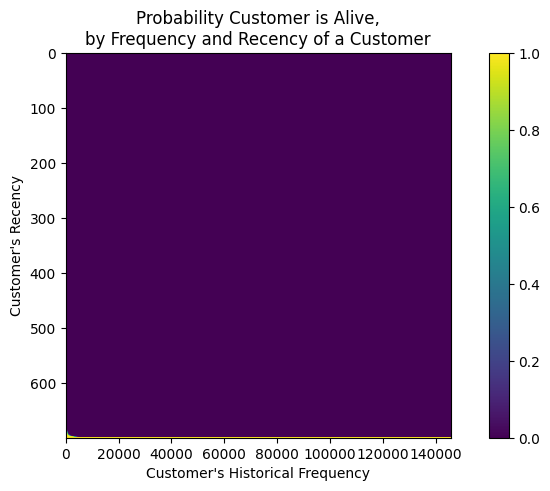

In [ ]:
%matplotlib inline
# set figure size
plt.subplots(figsize=(10, 5))
plot_probability_alive_matrix(bgf)
plt.show()

### Train Gamma - Gamma Model (Expected Spending)

In [87]:
# Creating Gamma-Gamma Model
ggf = GammaGammaFitter(penalizer_coef=0.1) # model object
ggf.fit(cltv['Frequency'], cltv['Monetary Value']) # model fitting

# Prediction of expected amount of average profit
cltv["expct_avg_spend"] = ggf.conditional_expected_average_profit(cltv['Frequency'], cltv['Monetary Value'])

cltv.head()

,DONOR_ID,Frequency,Monetary Value,Recency,Age,expctd_num_of_purch,expct_avg_spend,cltv_one_year
0,796.0,159,28.924528,362,526,1.153430e-21,29.042674,3.094416e-20
1,1739.0,148,13.939189,103,250,1.323441e-52,14.004301,1.715024e-51
2,1913.0,79,31.544304,523,526,5.178063e+01,31.803350,1.516081e+03
3,2051.0,604,12.592715,330,333,5.613159e+02,12.607263,6.558448e+03
4,2235.0,24,27.833333,63,406,5.719674e-17,28.604955,1.484721e-15


### Calculate DLV

In [59]:
# Calculating customer lifetime value by using BG-NBD and GammaGamma models:

cltv["cltv_one_year"] = ggf.customer_lifetime_value(bgf,
                                   cltv['Frequency'],
                                   cltv['Recency'],
                                   cltv['Age'],
                                   cltv['Monetary Value'],
                                   time=12,  # 12 month
                                   freq="D",  # frequency of T
                                   discount_rate=0.01)

cltv.sort_values("cltv_one_year",ascending=False).head()

,DONOR_ID,Frequency,Monetary Value,Recency,Age,expctd_num_of_purch,expct_avg_spend,cltv_one_year
7351,3222317.0,145586,20.907010,677,677,74750.034153,20.907040,1.447815e+06
8480,3732009.0,90345,19.725497,517,517,59985.797691,19.725544,1.096555e+06
5010,2172123.0,65440,33.752216,698,698,32630.360622,33.752279,1.020280e+06
2505,1085792.0,71817,25.710556,646,646,38565.963522,25.710615,9.186483e+05
244,98146.0,6680,382.791916,697,698,2291.563150,382.791960,8.126220e+05


#### Evaluate DLV Calculations on Holdout

In [ ]:
sample_holdout_data = pd.read_csv('/content/drive/MyDrive/Thesis WH399/sample_holdout_data.csv')

In [ ]:
sample_holdout_data.head()

,NAME,STATE,CITY,TRANSACTION_DT,TRANSACTION_AMT,DONOR_ID,DONATION_ID
0,"WILLIAMS, LUCINDA",AL,BIRMINGHAM,2023-11-05,208,3691221.0,1
1,"WILLIAMS, LUCINDA",AL,BIRMINGHAM,2023-01-31,208,3691221.0,2
2,"WILLIAMS, LUCINDA",AL,BIRMINGHAM,2023-02-15,208,3691221.0,3
3,"WILLIAMS, LUCINDA",AL,BIRMINGHAM,2023-02-28,208,3691221.0,4
4,"WILLIAMS, LUCINDA",AL,BIRMINGHAM,2023-03-15,208,3691221.0,5


In [79]:
sample_holdout_lifetimev = sample_holdout_data.groupby(by='DONOR_ID').agg(
    lifetime_365 =('TRANSACTION_AMT', 'sum'),
    avgtransaction_365=('TRANSACTION_AMT', 'mean'),
    donationcount_365 = ('DONATION_ID', 'nunique')
)

In [80]:
sample_holdout_lifetimev = sample_holdout_lifetimev.reset_index()
sample_holdout_lifetimev.head()

,DONOR_ID,lifetime_365,avgtransaction_365,donationcount_365
0,796.0,15,15.000000,1
1,1739.0,307,5.581818,55
2,3762.0,551,45.916667,12
3,3951.0,6825,273.000000,25
4,4051.0,941,9.905263,95


In [63]:
cltv

,DONOR_ID,Frequency,Monetary Value,Recency,Age,expctd_num_of_purch,expct_avg_spend,cltv_one_year
0,796.0,159,28.924528,362,526,1.153430e-21,28.950747,3.094416e-20
1,1739.0,148,13.939189,103,250,1.323441e-52,13.968466,1.715024e-51
2,1913.0,79,31.544304,523,526,5.178063e+01,31.596706,1.516081e+03
3,2051.0,604,12.592715,330,333,5.613159e+02,12.599914,6.558448e+03
4,2235.0,24,27.833333,63,406,5.719674e-17,28.007463,1.484721e-15
...,...,...,...,...,...,...,...,...
8650,3808877.0,372,14.779570,378,525,3.543726e-48,14.791194,4.857367e-47
8651,3809128.0,73,55.602740,616,623,4.064478e+01,55.655836,2.095740e+03
8652,3809534.0,20,19.500000,14,161,1.709951e-18,19.713502,3.128818e-17
8653,3810382.0,20,44.000000,215,581,2.292487e-06,44.200080,9.386895e-05


In [82]:
comparison = cltv.merge(sample_holdout_lifetimev, on = "DONOR_ID")

In [83]:
comparison.head()

,DONOR_ID,Frequency,Monetary Value,Recency,Age,expctd_num_of_purch,expct_avg_spend,cltv_one_year,lifetime_365,avgtransaction_365,donationcount_365
0,796.0,159,28.924528,362,526,1.153430e-21,28.950747,3.094416e-20,15,15.000000,1
1,1739.0,148,13.939189,103,250,1.323441e-52,13.968466,1.715024e-51,307,5.581818,55
2,3762.0,29,43.482759,487,634,1.039006e+00,43.620963,4.198449e+01,551,45.916667,12
3,3951.0,72,71.763889,456,615,5.930782e-06,71.815262,3.945998e-04,6825,273.000000,25
4,4051.0,18,19.722222,204,358,6.091367e-02,19.959297,1.126960e+00,941,9.905263,95


In [66]:
comparison['dlv_diff'] = comparison['365-lifetime'] - comparison['cltv_one_year']

In [70]:
import matplotlib
from matplotlib import pyplot as plt

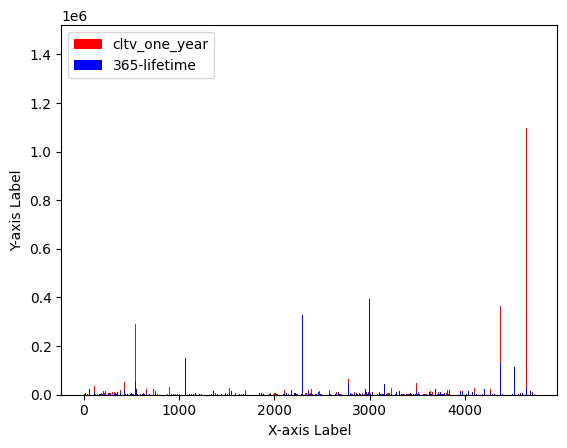

In [71]:
# Sort the DataFrame by 'cltv_one_year' in descending order
df_sorted = comparison.sort_values(by='cltv_one_year', ascending=False)

# Create a bar plot with sorted values
plt.bar(df_sorted.index, df_sorted["cltv_one_year"], color='red', label='cltv_one_year')
plt.bar(df_sorted.index, df_sorted["365-lifetime"], color='blue', label='365-lifetime')

# Add labels and a legend
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.legend()

# Show the plot
plt.show()


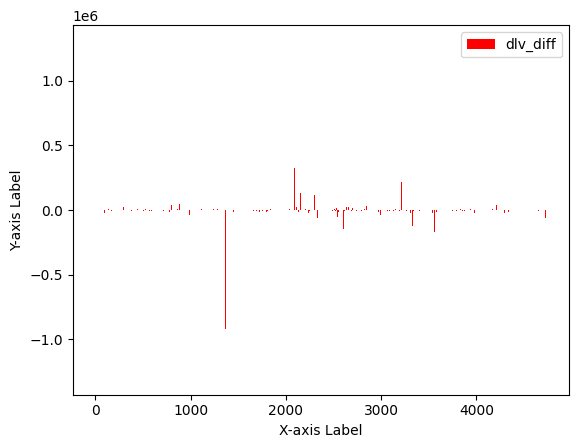

In [72]:
# Sort the DataFrame by 'cltv_one_year' in descending order
df_sorted = comparison.sort_values(by='dlv_diff', ascending=False)

# Create a bar plot with sorted values
plt.bar(df_sorted.index, df_sorted['dlv_diff'], color='red', label='dlv_diff')

# Add labels and a legend
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.legend()

# Show the plot
plt.show()


In [73]:
# Calculate the absolute percentage error for each data point
comparison['Percentage_Error'] = (abs(comparison['365-lifetime'] - comparison['cltv_one_year']) / comparison['365-lifetime']) * 100

# Calculate the MAPE
mape = comparison['Percentage_Error'].mean()

# Print the MAPE
print("Mean Average Percentage Error (MAPE):", mape)

Mean Average Percentage Error (MAPE): 1467.1025466820656


In [81]:
comparison.sort_values(by = ['dlv_diff'], ascending = False)

,DONOR_ID,Frequency,Monetary Value,Recency,Age,expctd_num_of_purch,expct_avg_spend,cltv_one_year,365-lifetime,365-donationcount,dlv_diff,Percentage_Error,Percentage_Error_Counts
3491,2786492.0,157,15691.719745,426,574,3.105257e-16,15690.652672,4.514592e-12,1301582,48,1.301582e+06,1.000000e+02,1.000000e+02
2999,2362375.0,5980,38.413378,674,676,1.772193e+00,38.414058,6.306825e+01,395412,18188,3.953489e+05,9.998405e+01,9.999026e+01
1771,1416468.0,172,13239.877907,512,666,1.587281e-15,13239.060153,1.946776e-11,379100,19,3.791000e+05,1.000000e+02,1.000000e+02
2089,1650058.0,48,60.375000,22,26,3.631139e+01,60.454654,2.044660e+03,327507,10229,3.254623e+05,9.937569e+01,9.964502e+01
3299,2630767.0,2460,30.743902,453,465,2.549951e-21,30.745589,7.266555e-20,300828,18786,3.008280e+05,1.000000e+02,1.000000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,98146.0,6680,382.791916,697,698,2.291563e+03,382.791960,8.126220e+05,236252,312,-5.763700e+05,2.439641e+02,6.344754e+02
1365,1085792.0,71817,25.710556,646,646,3.856596e+04,25.710615,9.186483e+05,75,3,-9.185733e+05,1.224764e+06,1.285432e+06
2741,2172123.0,65440,33.752216,698,698,3.263036e+04,33.752279,1.020280e+06,425,10,-1.019855e+06,2.399658e+05,3.262036e+05
4647,3732009.0,90345,19.725497,517,517,5.998580e+04,19.725544,1.096555e+06,26225,35,-1.070330e+06,4.081333e+03,1.712880e+05


In [84]:
comparison

,DONOR_ID,Frequency,Monetary Value,Recency,Age,expctd_num_of_purch,expct_avg_spend,cltv_one_year,lifetime_365,avgtransaction_365,donationcount_365
0,796.0,159,28.924528,362,526,1.153430e-21,28.950747,3.094416e-20,15,15.000000,1
1,1739.0,148,13.939189,103,250,1.323441e-52,13.968466,1.715024e-51,307,5.581818,55
2,3762.0,29,43.482759,487,634,1.039006e+00,43.620963,4.198449e+01,551,45.916667,12
3,3951.0,72,71.763889,456,615,5.930782e-06,71.815262,3.945998e-04,6825,273.000000,25
4,4051.0,18,19.722222,204,358,6.091367e-02,19.959297,1.126960e+00,941,9.905263,95
...,...,...,...,...,...,...,...,...,...,...,...
4729,3807804.0,26,119.423077,501,534,1.649460e+01,119.545215,1.826954e+03,25,25.000000,1
4730,3808648.0,49,45.102041,464,527,1.039552e+01,45.183486,4.352329e+02,35,35.000000,1
4731,3809128.0,73,55.602740,616,623,4.064478e+01,55.655836,2.095740e+03,95,47.500000,2
4732,3809534.0,20,19.500000,14,161,1.709951e-18,19.713502,3.128818e-17,4474,11.297980,396


In [75]:
# Calculate the absolute percentage error for each data point -- this time for counts
comparison['Percentage_Error_Counts'] = (abs(comparison['365-donationcount'] - comparison['expctd_num_of_purch']) / comparison['365-donationcount']) * 100

# Calculate the MAPE
mape = comparison['Percentage_Error_Counts'].mean()

# Print the MAPE
print("Mean Average Percentage Error (MAPE) for donation counts:", mape)

Mean Average Percentage Error (MAPE) for donation counts: 1255.944597437521


In [85]:
# Calculate the absolute percentage error for each data point -- this time for counts
comparison['Percentage_Error_AvgAmount'] = (abs(comparison['avgtransaction_365'] - comparison['expct_avg_spend']) / comparison['avgtransaction_365']) * 100

# Calculate the MAPE
mape = comparison['Percentage_Error_AvgAmount'].mean()

# Print the MAPE
print("Mean Average Percentage Error (MAPE) for average donation amount:", mape)

Mean Average Percentage Error (MAPE) for average donation amount: 66.5051713410108
